In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py

In [107]:
data = pd.read_csv('survey_results_public.csv')

In [118]:
data.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Code
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,USA
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,GBR
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,GBR
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,USA
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHE
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,NZL
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,USA
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN,POL
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN,COL
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,FRA


In [109]:
countries={'Afghanistan':'AFG',
'Aland Islands':'ALA','Albania':'ALB','Algeria':'DZA','American Samoa':'ASM','Andorra':'AND','Angola':'AGO','Anguilla':'AIA','Antigua and Barbuda':'ATG',
'Antarctica':'ATA','Argentina':'ARG','Armenia':'ARM','Aruba':'ABW','Australia':'AUS','Austria':'AUT','Azerbaijan':'AZE','Azerbaidjan':'AZE',
'Bahrain':'BHR','Bahamas':'BHS','Bangladesh':'BGD','Barbados':'BRB','Belarus':'BLR',
'Belgium':'BEL','Belize':'BLZ','Benin':'BEN','Bermuda':'BMU','Bhutan':'BTN','Bolivia':'BOL','Bosnia and Herzegovina':'BIH','Bosnia-Herzegovina':'BIH',
'Botswana':'BWA','Bouvet Island':'BVT','Brazil':'BRA','British Virgin Islands':'VGB','British Indian Ocean Territory':'IOT',
'Brunei':'BRN','Brunei Darussalam':'BRN','Bulgaria':'BGR','Burkina Faso':'BFA','Burma':'MMR',
'Burundi':'BDI','Cabo Verde':'CPV','Cape Verde':'CPV','Cambodia':'KHM','Cameroon':'CMR',
'Canada':'CAN','Cayman Islands':'CYM','Central African Republic':'CAF','Chad':'TCD','Chile':'CHL',
'Christmas Island':'CHR','China':'CHN','Colombia':'COL','Comoros':'COM','Congo, Democratic Republic of the':'COD',
'Congo, Republic of the':'COG','Cook Islands':'COK','Costa Rica':'CRI','Cote d\'Ivoire':'CIV',
"Ivory Coast (Cote D'Ivoire)":'CIV','Croatia':'HRV','Cuba':'CUB','Curacao':'CUW','Cyprus':'CYP',
'Czech Republic':'CZE','Denmark':'DNK','Djibouti':'DJI','Dominica':'DMA','Dominican Republic':'DOM',
'Ecuador':'ECU','Egypt':'EGY','El Salvador':'SLV','Equatorial Guinea':'GNQ','Eritrea':'ERI','Estonia':'EST',
'Ethiopia':'ETH','Falkland Islands (Islas Malvinas)':'FLK','Falkland Islands':'FLK','Faroe Islands':'FRO',
'Fiji':'FJI','Finland':'FIN','France':'FRA','French Polynesia':'PYF','Gabon':'GAB',
'Gambia, The':'GMB','Georgia':'GEO','Germany':'DEU','Ghana':'GHA','Gibraltar':'GIB',
'Greece':'GRC','Greenland':'GRL','Grenada':'GRD','Guam':'GUM','Guatemala':'GTM',
'Guernsey':'GGY','Guinea-Bissau':'GNB','Guinea':'GIN','Guyana':'GUY','French Guyana':'GUY','Haiti':'HTI',
'Honduras':'HND','Heard and McDonald Islands':'HMD','Hong Kong':'HKG','Hungary':'HUN','Iceland':'ISL',
'India':'IND','Indonesia':'IDN','Iran':'IRN','Iraq':'IRQ','Ireland':'IRL','Isle of Man':'IMN',
'Israel':'ISR','Italy':'ITA','Jamaica':'JAM','Japan':'JPN','Jersey':'JEY','Jordan':'JOR',
'Kazakhstan':'KAZ','Kenya':'KEN','Kiribati':'KIR','Korea, North':'KOR','Korea, South':'PRK',
'South Korea':'PRK','North Korea':'KOR','Kosovo':'KSV','Kuwait':'KWT','Kyrgyzstan':'KGZ',
'Laos':'LAO','Latvia':'LVA','Lebanon':'LBN','Lesotho':'LSO','Liberia':'LBR','Libya':'LBY','Liechtenstein':'LIE',
'Lithuania':'LTU','Luxembourg':'LUX','Macau':'MAC','Macedonia':'MKD','Madagascar':'MDG',
'Malawi':'MWI','Malaysia':'MYS','Maldives':'MDV','Mali':'MLI','Malta':'MLT','Marshall Islands':'MHL',
'Martinique (French)':'MTQ','Mauritania':'MRT','Mauritius':'MUS','Mexico':'MEX','Micronesia, Federated States of':'FSM',
'Moldova':'MDA','Moldavia':'MDA','Monaco':'MCO','Mongolia':'MNG','Montenegro':'MNE','Montserrat':'MSR',
'Morocco':'MAR','Mozambique':'MOZ','Myanmar':'MMR','Namibia':'NAM','Nepal':'NPL','Netherlands':'NLD',
'Netherlands Antilles':'ANT','New Caledonia':'NCL','New Caledonia (French)':'NCL','New Zealand':'NZL','Nicaragua':'NIC',
'Nigeria':'NGA','Niger':'NER','Niue':'NIU','Northern Mariana Islands':'MNP','Norway':'NOR','Oman':'OMN',
'Pakistan':'PAK','Palau':'PLW','Panama':'PAN','Papua New Guinea':'PNG','Paraguay':'PRY','Peru':'PER',
'Philippines':'PHL','Pitcairn Island':'PCN','Poland':'POL','Polynesia (French)':'PYF','Portugal':'PRT',
'Puerto Rico':'PRI','Qatar':'QAT','Reunion (French)':'REU','Romania':'ROU','Russia':'RUS','Russian Federation':'RUS',
'Rwanda':'RWA','Saint Kitts and Nevis':'KNA','Saint Lucia':'LCA','Saint Martin':'MAF','Saint Pierre and Miquelon':'SPM',
'Saint Vincent and the Grenadines':'VCT','Saint Vincent & Grenadines':'VCT','S. Georgia & S. Sandwich Isls.':'SGS','Samoa':'WSM',
'San Marino':'SMR','Saint Helena':'SHN','Sao Tome and Principe':'STP','Saudi Arabia':'SAU','Senegal':'SEN',
'Serbia':'SRB','Seychelles':'SYC','Sierra Leone':'SLE','Singapore':'SGP','Sint Maarten':'SXM',
'Slovakia':'SVK','Slovak Republic':'SVK','Slovenia':'SVN','Solomon Islands':'SLB','Somalia':'SOM','South Africa':'ZAF',
'South Sudan':'SSD','Spain':'ESP','Sri Lanka':'LKA','Sudan':'SDN','Suriname':'SUR',
'Swaziland':'SWZ','Sweden':'SWE','Switzerland':'CHE','Syria':'SYR','Taiwan':'TWN','Tajikistan':'TJK',
'Tadjikistan':'TJK','Tanzania':'TZA','Thailand':'THA','Timor-Leste':'TLS','Togo':'TGO','Tonga':'TON',
'Trinidad and Tobago':'TTO','Tunisia':'TUN','Turkey':'TUR','Turkmenistan':'TKM','Tuvalu':'TUV',
'Uganda':'UGA','Ukraine':'UKR','United Arab Emirates':'ARE','United Kingdom':'GBR','United States':'USA',
'U.S. Minor Outlying Islands':'UMI','Uruguay':'URY','Uzbekistan':'UZB','Vanuatu':'VUT',
'Vatican City State':'VAT','Venezuela':'VEN','Vietnam':'VNM','Virgin Islands':'VGB',
'Virgin Islands (USA)':'VIR','Virgin Islands (British)':'VGB','West Bank':'WBG','Yemen':'YEM',
'Zaire':'ZAR','Zambia':'ZMB','Zimbabwe':'ZWE'}

# Distribution of Developers

In [110]:
codes = [countries[country] if country != 'I prefer not to say' else None for country in data['Country']]
data['Code']=codes

In [111]:
gdata = [ dict(
        type = 'choropleth',
        locations = data['Code'].value_counts().index,
        z = data['Code'].value_counts(),
        text = data['Code'].value_counts().index,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            tickprefix = '#',
            title = '# Devs'),
      ) ]

layout = dict(
    title = 'Developers Distribution',
    geo = dict(
            projection = dict(
                type = 'Mercator'
            ),
            showframe=False
            )
)




figure = dict( data=gdata, layout=layout )
iplot(figure)

In [112]:
languages = [lang for sublist in [str(langs).replace(" ", "").split(";") for langs in data['HaveWorkedLanguage']] for lang in sublist]
languages = pd.Series(languages)

In [113]:
languages.value_counts()[0:10]

JavaScript    22875
SQL           18754
nan           14767
Java          14524
C#            12476
Python        11704
PHP           10290
C++            8155
C              6974
TypeScript     3488
dtype: int64

# Developers Satisfaction

In [114]:
data[['Code','JobSatisfaction']].groupby('Code').mean().index

Index([u'ABW', u'AFG', u'AGO', u'AIA', u'ALA', u'ALB', u'AND', u'ANT', u'ARE',
       u'ARG',
       ...
       u'VCT', u'VEN', u'VGB', u'VIR', u'VNM', u'YEM', u'ZAF', u'ZAR', u'ZMB',
       u'ZWE'],
      dtype='object', name=u'Code', length=199)

In [115]:
gdata = [ dict(
        type = 'choropleth',
        locations = data[['Code','JobSatisfaction']].groupby('Code').mean().index,
        z = data[['Code','JobSatisfaction']].groupby('Code').mean()['JobSatisfaction'],
        text = data[['Code','JobSatisfaction']].groupby('Code').mean().index,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            tickprefix = '#',
            title = '# Devs'),
      ) ]

layout = dict(
    title = 'Developers Satisfaction',
    geo = dict(
            projection = dict(
                type = 'Mercator'
            ),
            showframe=False
            )
)




figure = dict( data=gdata, layout=layout )
iplot(figure)

# Professional

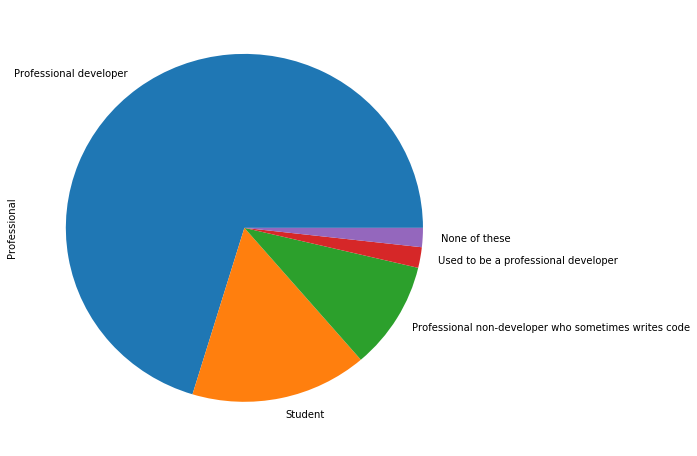

In [116]:
%matplotlib inline
data['Professional'].value_counts().plot(kind='pie',figsize=(8,8))


# FormalEducation

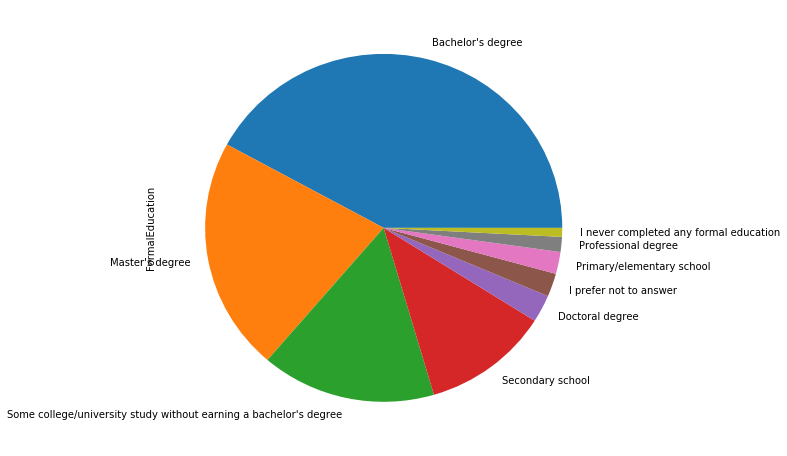

In [32]:
%matplotlib inline
data['FormalEducation'].value_counts().plot(kind='pie',figsize=(8,8))

# Country

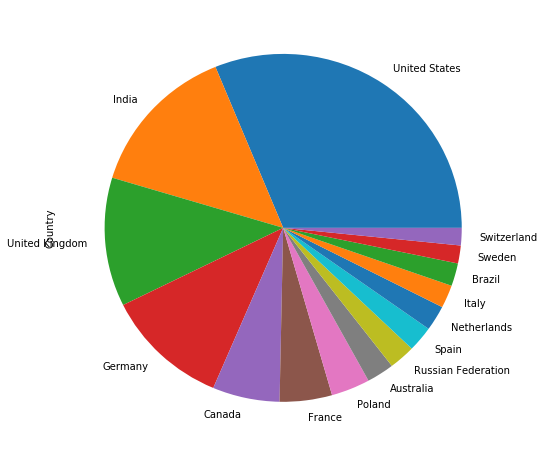

In [34]:
%matplotlib inline
data['Country'].value_counts()[0:15].plot(kind='pie',figsize=(8,8))

# CompanySize

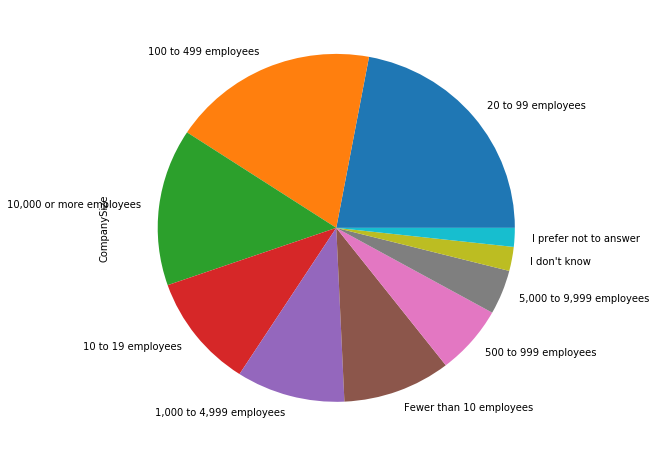

In [35]:
data['CompanySize'].value_counts().plot(kind='pie',figsize=(8,8))


In [47]:
iplot(kind='pie',labels='labels',values='CompanySize',pull=.2,hole=.2,
          colorscale='blues',textposition='outside',textinfo='value+percent')

TypeError: iplot() got an unexpected keyword argument 'kind'

# FormalEducation

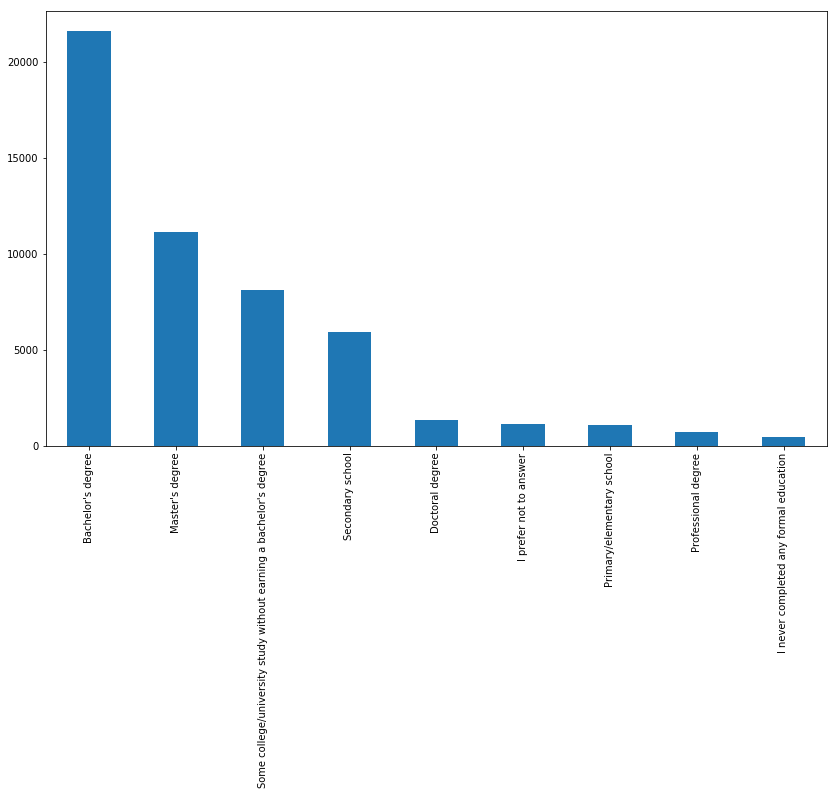

In [40]:

data['FormalEducation'].value_counts().plot(kind='bar',figsize=(14,8))

# HaveWorkedPlatform

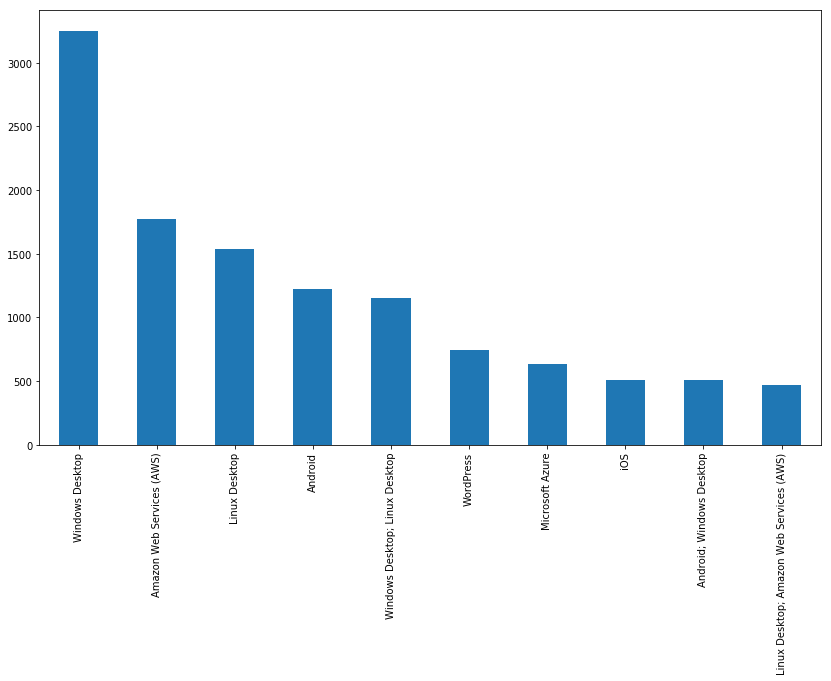

In [39]:
data['HaveWorkedPlatform'].value_counts()[0:10].plot(kind='bar',figsize=(14,8))

# MajorUndergrad

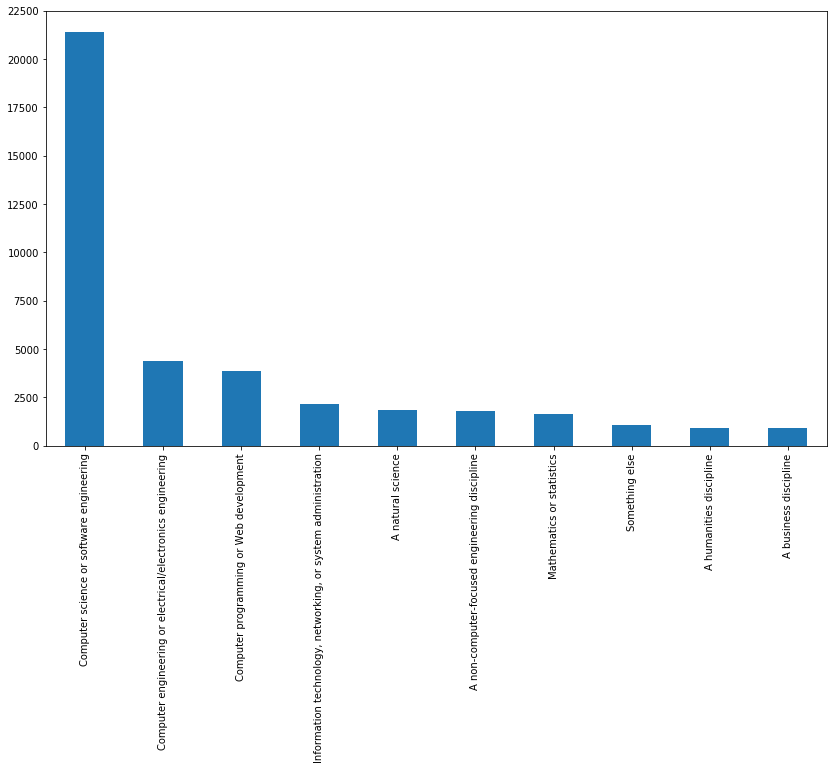

In [38]:
data['MajorUndergrad'].value_counts()[0:10].plot(kind='bar',figsize=(14,8))

# CompanyType

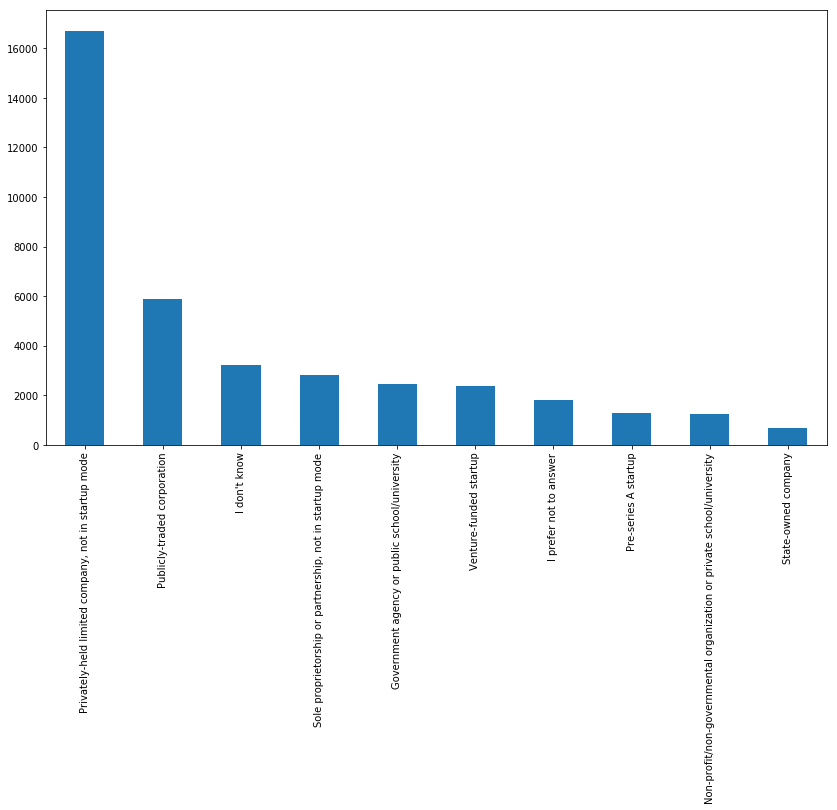

In [41]:
data['CompanyType'].value_counts()[0:10].plot(kind='bar',figsize=(14,8))

# YearsProgram

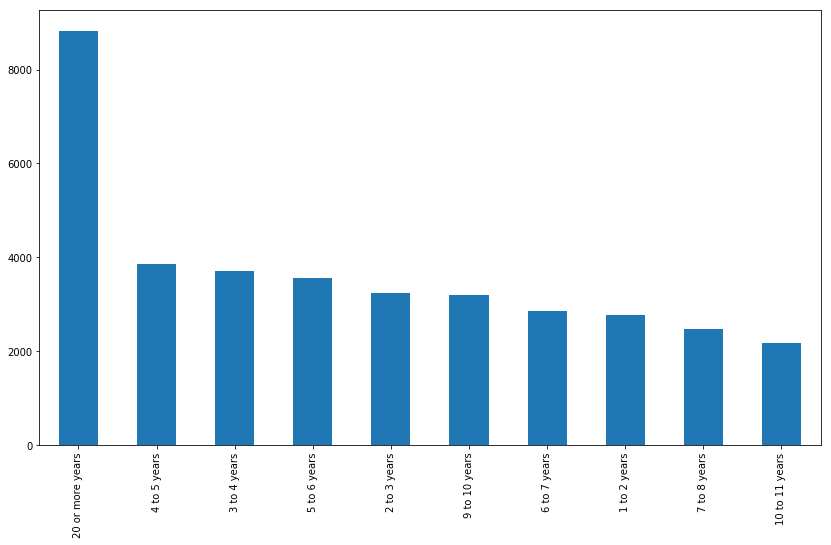

In [42]:
data['YearsProgram'].value_counts()[0:10].plot(kind='bar',figsize=(14,8))

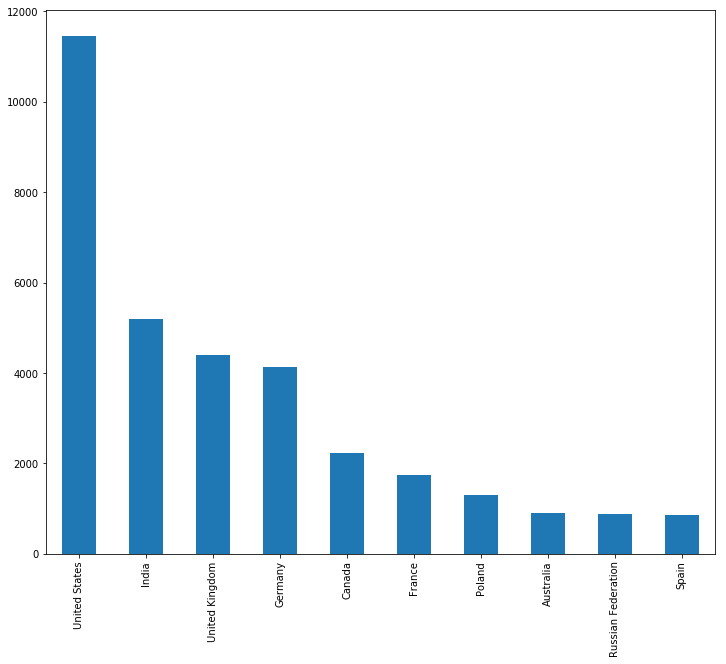

In [64]:
data['Country'].value_counts()[0:10].plot(kind='bar',figsize=(12,10))

In [77]:
from IPython.display import display_html
display_html("<button onclick=\"javascript:toggleInput(6)\" class=\"button\">Show Country Dictionary</button>")